In [43]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import configparser
import seaborn


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [44]:
config = configparser.ConfigParser()
config.read('config.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [45]:
uri = 'spotify:user:spotifycharts:playlist:37i9dQZEVXbJiZcmkrIHGU'
username = username
#for dislike use code "3xnQnyd2QCbnvrddutyeNt"
#for like use code "5bUBlFUZyNPTpq5LiFC63k"
#for awe use code "5VVV4Dk2ZNZ7xufgvigupS"
playlist_id = "5bUBlFUZyNPTpq5LiFC63k" #add the last part of the playlist url here. 

results = spotify.user_playlist(username, playlist_id)


In [46]:
results['tracks']['items'][0]['track']['id']

'61dYvvfIRtIDFuqZypPAta'

In [47]:
df = []
for i in results['tracks']['items']:
    df.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
df = pd.DataFrame(df)  

In [48]:
df.columns = ['song_id','added_at','Artist','Album','Durastion_ms','Song','Popularity']

In [49]:
df

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity
0,61dYvvfIRtIDFuqZypPAta,2019-04-05T06:36:44Z,Johann Sebastian Bach,"Bach: Cello Suites Nos. 1-6, BWV 1007-1012",151480,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",65
1,1l9IbaGI8VtUOEjGaehg59,2019-04-05T08:47:40Z,Cautious Clay,Table of Context,166706,SOMETHING FOR NOTHING,55
2,3DNRdudZ2SstnDCVKFdXxG,2019-04-05T09:21:15Z,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3",315426,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",67
3,5bu9A6uphPWg39RC3ZKeku,2019-04-05T09:21:17Z,Johann Sebastian Bach,"Bach: The Goldberg Variations, BWV 988 (1981) ...",184853,"Goldberg Variations, BWV 988: Aria - Remastered",60
4,7n92QzQomRCLlciO14X0kd,2019-04-05T09:21:17Z,Frédéric Chopin,Chopin: Nocturnes (Volume 1),268426,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,66


In [50]:
sp = spotipy.Spotify(auth=token)

In [51]:
et = []
for i in df.song_id:
    x = sp.audio_features(i)
    et.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
et = pd.DataFrame(et)

In [52]:
et.columns = ['song_id',
             'danceability',
             'energy',
             'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

In [53]:
DF = pd.merge(df, et, on='song_id')

In [54]:
DF

,song_id,added_at,Artist,Album,Durastion_ms,Song,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,61dYvvfIRtIDFuqZypPAta,2019-04-05T06:36:44Z,Johann Sebastian Bach,"Bach: Cello Suites Nos. 1-6, BWV 1007-1012",151480,"Cello Suite No. 1 in G Major, BWV 1007: I. Pré...",65,0.257,0.10900,7,-21.356,1,0.0597,0.900,0.867000,0.0762,0.307,75.020,4
1,1l9IbaGI8VtUOEjGaehg59,2019-04-05T08:47:40Z,Cautious Clay,Table of Context,166706,SOMETHING FOR NOTHING,55,0.425,0.40200,2,-8.581,1,0.0418,0.233,0.000009,0.1130,0.150,166.813,4
2,3DNRdudZ2SstnDCVKFdXxG,2019-04-05T09:21:15Z,Ludwig van Beethoven,"Beethoven: Piano Sonatas, Vol.3",315426,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",67,0.184,0.00527,1,-37.264,0,0.0432,0.995,0.887000,0.1730,0.151,170.612,3
3,5bu9A6uphPWg39RC3ZKeku,2019-04-05T09:21:17Z,Johann Sebastian Bach,"Bach: The Goldberg Variations, BWV 988 (1981) ...",184853,"Goldberg Variations, BWV 988: Aria - Remastered",60,0.454,0.01390,4,-29.966,0,0.0514,0.995,0.943000,0.0736,0.244,130.253,4
4,7n92QzQomRCLlciO14X0kd,2019-04-05T09:21:17Z,Frédéric Chopin,Chopin: Nocturnes (Volume 1),268426,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,66,0.387,0.04510,3,-24.698,1,0.0364,0.990,0.913000,0.1120,0.071,61.494,4


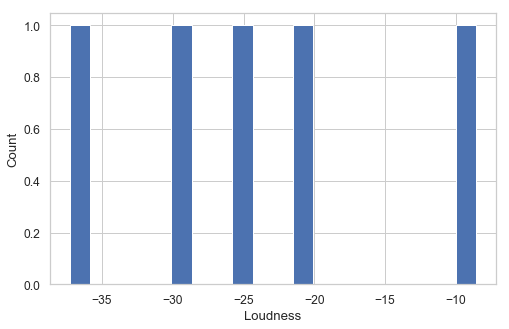

In [55]:
seaborn.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
seaborn.distplot(
    et['loudness'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Loudness', ylabel='Count');